In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#loading tables into dataframes
drug_df = pd.read_csv('../drug_fda.csv')
new_drug_df = drug_df[['primaryid', 'caseid', 'drug_seq', 'role_cod', 'drugname',
       'val_vbm', 'cum_dose_chr', 'cum_dose_unit', 'lot_num']]

demo_df = pd.read_csv('../demo_fda.csv')
new_demo_df = demo_df[['primaryid', 'caseid', 'caseversion', 'age', 'age_cod',
       'sex', 'wt', 'wt_cod', 'occp_cod', 'reporter_country', 'occr_country',
       'occp_cod_num']]

outcomes_df = pd.read_csv('../outcomes_fda.csv')

reactions_df = pd.read_csv('../reaction_fda.csv')

/Users/endernova/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/endernova/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
new_drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546835 entries, 0 to 1546834
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   primaryid      1546835 non-null  int64  
 1   caseid         1546835 non-null  int64  
 2   drug_seq       1546835 non-null  int64  
 3   role_cod       1546835 non-null  object 
 4   drugname       1546823 non-null  object 
 5   val_vbm        1546835 non-null  int64  
 6   cum_dose_chr   49001 non-null    float64
 7   cum_dose_unit  49011 non-null    object 
 8   lot_num        236716 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 106.2+ MB


In [6]:
new_demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394066 entries, 0 to 394065
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   primaryid         394066 non-null  int64  
 1   caseid            394066 non-null  int64  
 2   caseversion       394066 non-null  int64  
 3   age               235444 non-null  float64
 4   age_cod           235452 non-null  object 
 5   sex               347760 non-null  object 
 6   wt                81142 non-null   float64
 7   wt_cod            81142 non-null   object 
 8   occp_cod          387070 non-null  object 
 9   reporter_country  394066 non-null  object 
 10  occr_country      394053 non-null  object 
 11  occp_cod_num      387070 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 36.1+ MB


In [7]:
outcomes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299135 entries, 0 to 299134
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   primaryid  299135 non-null  int64 
 1   caseid     299135 non-null  int64 
 2   outc_cod   299135 non-null  object
dtypes: int64(2), object(1)
memory usage: 6.8+ MB


In [8]:
reactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250978 entries, 0 to 1250977
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   primaryid     1250978 non-null  int64 
 1   caseid        1250978 non-null  int64 
 2   pt            1250978 non-null  object
 3   drug_rec_act  2988 non-null     object
dtypes: int64(2), object(2)
memory usage: 38.2+ MB


In [9]:
drug_demo = new_drug_df.merge(new_demo_df, on='primaryid', how='left')
drug_demo_outcomes = drug_demo.merge(outcomes_df,on='primaryid',how='left')
merged_df = drug_demo_outcomes.merge(reactions_df, on='primaryid',how='left')



In [10]:
reporter_counts = drug_demo.reset_index().groupby('occp_cod').nunique()
'''
CN = Consumer
LW = Lawyer
MD = Physician
OT = Other health-care professional
PH = Pharmacist
'''
reporter_counts

,index,primaryid,caseid_x,drug_seq,role_cod,drugname,val_vbm,cum_dose_chr,cum_dose_unit,lot_num,...,caseversion,age,age_cod,sex,wt,wt_cod,occp_cod,reporter_country,occr_country,occp_cod_num
occp_cod,,,,,,,,,,,,,,,,,,,,,
CN,538631,168973,168973,310,4,28474,2,2399,19,23336,...,50,698,6,3,2594,2,1,120,130,1
LW,41199,6431,6431,259,4,2774,2,364,7,72,...,17,87,4,2,376,1,1,15,14,1
MD,425845,99246,99246,227,4,27834,2,4258,20,10998,...,60,476,6,3,2176,2,1,137,137,1
OT,354945,80654,80654,200,4,23323,2,2797,22,9293,...,48,179,6,3,2207,2,1,122,124,1
PH,115688,31766,31766,256,4,13614,2,854,14,4211,...,27,141,5,3,1357,2,1,75,75,1


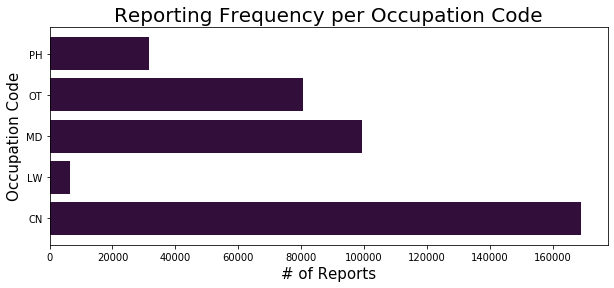

In [25]:
fig, ax = plt.subplots(1, figsize = (10,4))
objects = ('CN', 'LW', 'MD', 'OT', 'PH')
y_pos = np.arange(len(objects))

plt.barh(y_pos, reporter_counts['primaryid'], align='center', color='#320E3B')
plt.yticks(y_pos, objects)
plt.xlabel('# of Reports', fontsize=15)
plt.ylabel('Occupation Code', fontsize=15)
plt.title('Reporting Frequency per Occupation Code', fontsize=20)
plt.savefig('report_sources_freq.png');


In [23]:
outcome_counts = drug_demo_outcomes.reset_index().groupby('outc_cod').nunique()

'''
CA = congenital anomaly
DE = death
DS = disability
HO = Hospitalization - initial or prolonged
LT = life-threatening
OT = other serious (important medical event)
RI = required intervention to prevent permanent impairment/damage
'''

outcome_counts

,index,primaryid,caseid_x,drug_seq,role_cod,drugname,val_vbm,cum_dose_chr,cum_dose_unit,lot_num,...,age_cod,sex,wt,wt_cod,occp_cod,reporter_country,occr_country,occp_cod_num,caseid,outc_cod
outc_cod,,,,,,,,,,,,,,,,,,,,,
CA,5760,1335,1335,71,3,1472,2,126,9,66,...,6,3,197,1,5,50,50,5,1335,1
DE,149112,31964,31964,256,4,14238,2,1710,16,2794,...,6,3,1200,2,5,124,131,5,31964,1
DS,39454,6410,6410,124,4,7157,2,721,11,1027,...,5,2,745,2,5,82,81,5,6410,1
HO,562203,94243,94243,227,4,35855,2,4518,20,11997,...,6,3,2512,2,5,133,132,5,94243,1
LT,78221,12113,12113,195,4,11366,2,1235,18,1373,...,5,3,973,2,5,101,102,5,12113,1
OT,793599,152703,152703,310,4,38789,2,5473,21,15891,...,6,3,2773,2,5,149,149,5,152703,1
RI,755,367,367,28,3,419,2,0,0,40,...,3,2,146,2,4,2,2,4,367,1


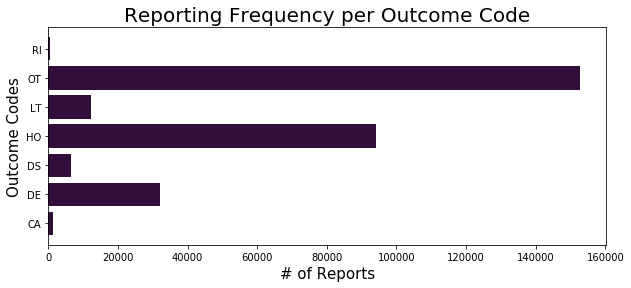

In [29]:
fig, ax = plt.subplots(1, figsize = (10,4))
objects = ('CA', 'DE', 'DS', 'HO', 'LT', 'OT', 'RI')
y_pos = np.arange(len(objects))

plt.barh(y_pos, outcome_counts['primaryid'], align='center', color='#320E3B')
plt.yticks(y_pos, objects)
plt.xlabel('# of Reports', fontsize=15)
plt.ylabel('Outcome Codes', fontsize=15)
plt.title('Reporting Frequency per Outcome Code', fontsize=20)
plt.savefig('reports_of_outcomes.png');


In [ ]:
merged_df['drugname'].describe()

In [ ]:
merged_df[['age','age_cod']]
merged_df['age_cod'].unique()

def code_to_numeric(code):
    '''
    Converts age units to age in years
    '''
    if code == 'DY':
        return 1/365
    if code == 'YR':
        return 1
    if code == np.nan:
        return 0
    if code == 'MON':
        return 1/12
    if code == 'DEC':
        return 10
    if code == 'WK':
        return 7/365
    if code == 'HR':
        return 1/8760


In [ ]:
merged_df['age_multiplier'] = merged_df['age_cod'].map(code_to_numeric)
merged_df['age_in_years'] = merged_df['age'] * merged_df['age_multiplier']
(merged_df['age_in_years']).describe()

In [ ]:
#The distribution of patient age in years appears to be left-skewed

fig, ax = plt.subplots(1, figsize = (10,4)) 
ax.hist(merged_df['age_in_years'], bins=50, color='#7D3C98',edgecolor = 'white')
ax.set_title('Distribution of Age in Years',fontsize=20)
ax.set_xlabel('Age in Years',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
plt.savefig('Age_distribution.png');

In [ ]:
merged_df[['wt_cod','wt']]
merged_df['wt_cod'].unique()

def weight_conversion(code):
    '''
    converts weight units to weight in lbs
    '''
    if code == 'KG':
        return 2.20462
    if code == np.nan:
        return 0
    if code == 'LBS':
        return 1


In [ ]:
merged_df['weight_multiplier'] = merged_df['wt_cod'].map(weight_conversion)
merged_df['wt_in_lbs'] = merged_df['weight_multiplier'] * merged_df['wt']
merged_df['wt_in_lbs']

In [ ]:
#This distribution of patient weights appears to be right-skewed
fig, ax = plt.subplots(1, figsize=(10,4))
ax.hist(merged_df['wt_in_lbs'], bins=55, color='#581845', edgecolor = 'white')
ax.set_title('Distribution of Patient Weights', fontsize=20)
ax.set_xlabel('Weight in lbs', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
plt.savefig('pt_wt_distribution.png');

In [ ]:
#What we have here is an extreme outlier in the dataset. Likely this patient's weight was entered incorrectly.
merged_df[merged_df['wt_in_lbs'] == merged_df['wt_in_lbs'].max()]

In [ ]:
#Filtering out extreme outliers
merged_df = merged_df[merged_df['wt_in_lbs'] <= 500]
merged_df = merged_df[merged_df['age'] > 0]
merged_df.shape

In [ ]:
#Getting an idea of the demographics of my dataset using attributes age, weight, and sex
fig, ax = plt.subplots(1,figsize=(10,4))
ax.scatter(merged_df['age_in_years'][merged_df['sex'] == 'M'], merged_df['wt_in_lbs'][merged_df['sex']=='M'], color= '#2A89A7', alpha=0.05)
ax.scatter(merged_df['age_in_years'][merged_df['sex'] == 'F'], merged_df['wt_in_lbs'][merged_df['sex']=='F'], color='#9D496E', alpha=0.05)
ax.set_title('Age vs Weight in Males and Females', fontsize = 20)
ax.set_xlabel('Age in Years', fontsize = 15)
ax.set_ylabel('Weight in lbs', fontsize = 15)
ax.legend(('Male', 'Female'))
plt.savefig('Age_weight_scat.png');

In [ ]:
merged_df['age_group'] = (merged_df['age_in_years'] // 10) * 10 
merged_df.groupby(['age_group','sex']).count()['primaryid']

In [ ]:
x = merged_df.groupby(['age_group','sex'])
top_drugs_per_age = x['drugname'].describe()
top_drugs_per_age

In [ ]:
age_sex_grouped = merged_df.groupby(['age_group','sex']).count()
top_drugs_per_age['percentage'] = (top_drugs_per_age['freq'] / age_sex_grouped['primaryid']) * 100
top_drugs_per_age

In [ ]:
abrv_df = merged_df[['age_in_years','sex','age_group','drugname','outc_cod','occp_cod']]
# abrv_df['sex'].value_counts()

In [ ]:

np.mean(abrv_df['age_in_years']) #Avg age 58.077675310317574
np.median(abrv_df['age_in_years']) #Median 62.0


In [ ]:
below_mean_age = abrv_df[abrv_df['age_in_years'] < 58.07]
above_mean_age = abrv_df[abrv_df['age_in_years'] >= 58.07]

In [ ]:
above_mean_age.head()